# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 12

## Problem 1a

We can look at the data from within this notebook in the same way we did for Chapter 11.  Let's dispense with the preliminaries:  

In [11]:
# import PmagPy functions
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag 
import numpy as np # while we are at it, let's import numpy
import matplotlib.pyplot as plt # set up for plotting 
%matplotlib inline
from IPython.display import Image



and get to it - first the **ipmag.plot_di( )** way and then the command line program **eqarea.py**:  

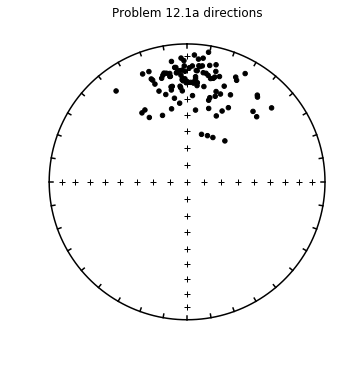

In [20]:
data=np.loadtxt('Chapter_12/ps12-1a.di')# read in data
DI=data.transpose()# transpose
plt.figure(num=1,figsize=(5,5)) # set up the figure object
ipmag.plot_net(1) # plot the equal area net
ipmag.plot_di(DI[0],DI[1]) # put on the directions
plt.title("Problem 12.1a directions"); # give it a title

In [13]:
!eqarea.py -f Chapter_12/ps12-1a.di -sav -fmt png

1  saved in  ps12-1a_eq.png


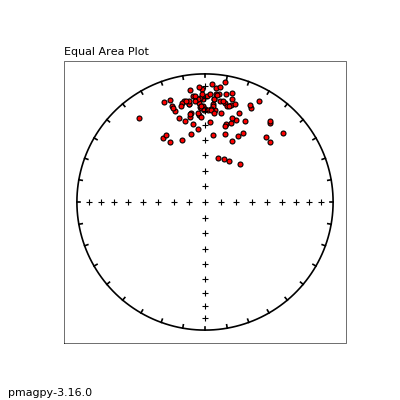

In [16]:
Image(filename='ps12-1a_eq.png')

This looks Fisherian to me!  See how the data are pretty much symmetrical about the mean direction?  But let's check with either **ipmag.fishqq( )** or the command line program **fishqq.py**.  First we'll get the help message for the **ipmag** version: 

In [17]:
help(ipmag.fishqq)

Help on function fishqq in module pmagpy.ipmag:

fishqq(lon=None, lat=None, di_block=None)
    Test whether a distribution is Fisherian and make a corresponding Q-Q plot.
    The Q-Q plot shows the data plotted against the value expected from a
    Fisher distribution. The first plot is the uniform plot which is the
    Fisher model distribution in terms of longitude (declination). The second
    plot is the exponential plot which is the Fisher model distribution in terms
    of latitude (inclination). In addition to the plots, the test statistics Mu
    (uniform) and Me (exponential) are calculated and compared against the
    critical test values. If Mu or Me are too large in comparision to the test
    statistics, the hypothesis that the distribution is Fisherian is rejected
    (see Fisher et al., 1987).
    
    Parameters:
    -----------
    lon : longitude or declination of the data
    lat : latitude or inclination of the data
        or
    di_block: a nested list of [dec,inc

{'Dec': 3.2952175510041122,
 'Inc': 27.616634753104599,
 'Me': 0.98280311722089397,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 1.1047799077884539,
 'Mu_critical': 1.207,
 'N': 100,
 'Test_result': 'consistent with Fisherian model'}

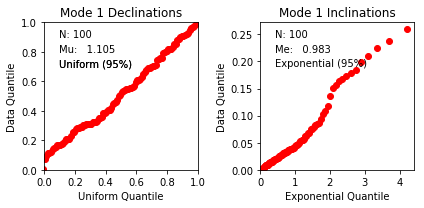

In [21]:
ipmag.fishqq(di_block=data) # use data read in problem 1a.

And now the help message for **fishqq.py** 

In [24]:
!fishqq.py -h


    NAME
       fishqq.py

    DESCRIPTION
       makes qq plot from dec,inc input data

    INPUT FORMAT
       takes dec/inc pairs in space delimited file

    SYNTAX
       fishqq.py [command line options]

    OPTIONS
        -h help message
        -f FILE, specify file on command line
        -F FILE, specify output file for statistics
        -sav save and quit [saves as input file name plus fmt extension]
        -fmt specify format for output [png, eps, svg, pdf] 

    OUTPUT:
        Dec Inc N Mu Mu_crit Me Me_crit Y/N
     where direction is the principal component and Y/N is Fisherian or not
     separate lines for each mode with N >=10 (N and R)
    


So we can run it like this:

In [25]:
!fishqq.py -f Chapter_12/ps12-1a.di -sav -fmt png

1  saved in  Chapter_12-ps12-1a.di_unf1.png
2  saved in  Chapter_12-ps12-1a.di_exp1.png


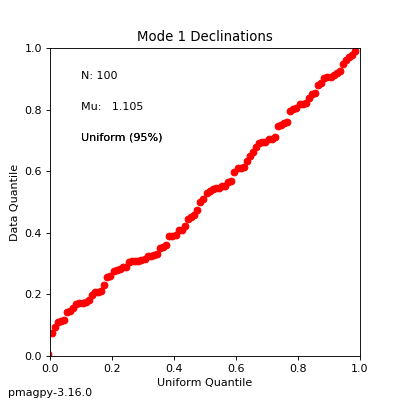

In [26]:
Image(filename='Chapter_12-ps12-1a.di_unf1.png')

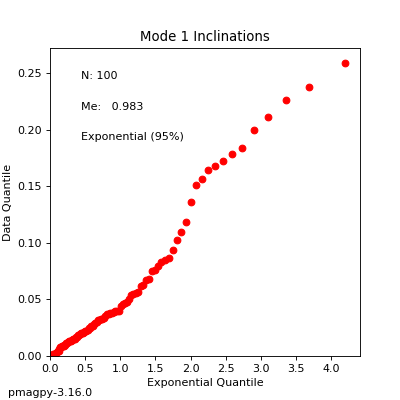

In [27]:
Image(filename='Chapter_12-ps12-1a.di_exp1.png')

And it looks like at the 95% confidence level, this data set IS Fisherian.

## Problem 1b

Now let's try the other data set.

In [28]:
!eqarea.py -f Chapter_12/ps12-1b.di -sav -fmt png

1  saved in  ps12-1b_eq.png


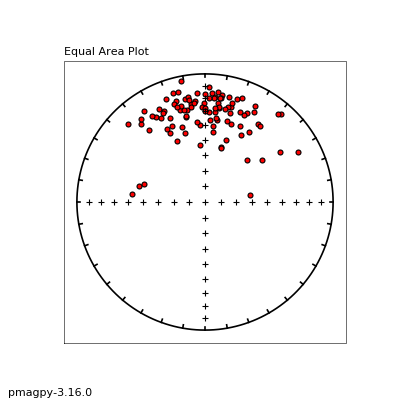

In [29]:
Image(filename='ps12-1b_eq.png')

Whoa!  This one does not look Fisherian. See how there are 'outliers'  and the data are spread out more in declination than in inclination?   So let's check with fishqq.py

In [30]:
!fishqq.py -f Chapter_12/ps12-1b.di -sav -fmt png

1  saved in  Chapter_12-ps12-1b.di_unf1.png
2  saved in  Chapter_12-ps12-1b.di_exp1.png


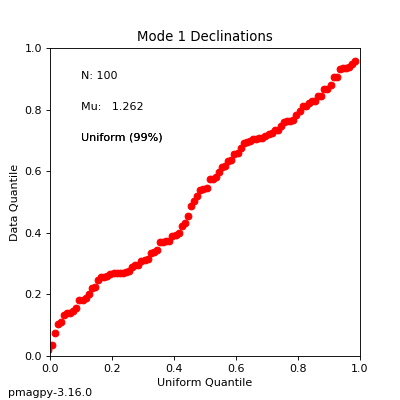

In [31]:
Image(filename='Chapter_12-ps12-1b.di_unf1.png')

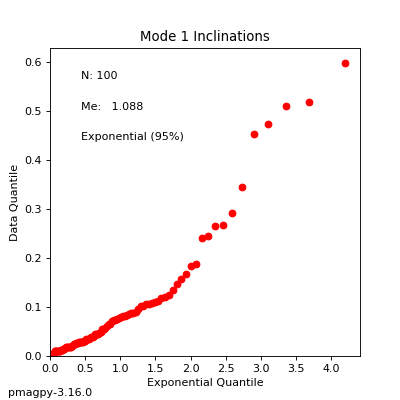

In [32]:
Image(filename='Chapter_12-ps12-1b.di_exp1.png')

Surprise!  This one is only Fisherian at the 99% level of confidence - not 95%.  

Let's take a look at the data in Chapter_12/ps12-1c.di

In [33]:
!eqarea.py -f Chapter_12/ps12-1c.di -sav -fmt png

1  saved in  ps12-1c_eq.png


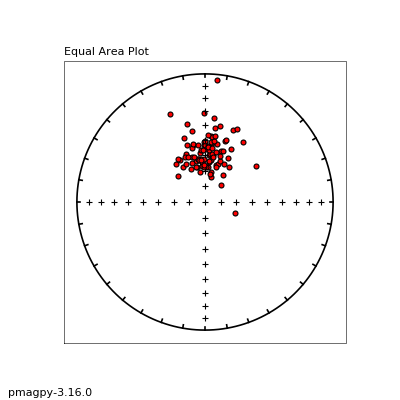

In [34]:
Image(filename='ps12-1c_eq.png')

And now get the Fisher mean using **gofish.py**. 

In [35]:
!gofish.py -f Chapter_12/ps12-1c.di

    1.8    58.1    98    94.8617     30.9     2.6    14.6


To find out what the output means, get the help message:

In [36]:
!gofish.py -h


    NAME
       gofish.py

    DESCRIPTION
       calculates fisher parameters from dec inc data

    INPUT FORMAT
       takes dec/inc as first two columns in space delimited file

    SYNTAX
       gofish.py [options]  [< filename]

    OPTIONS
        -h prints help message and quits
        -i for interactive filename entry
        -f FILE, specify input file
        -F FILE, specifies output file name
        < filename for reading from standard input
   
    OUTPUT
       mean dec, mean inc, N, R, k, a95, csd

    


Now we rotate the data to the mean declination and inclination using **di_rot.py**.  But first, a little help message would be great.

In [37]:
!di_rot.py -h


    NAME
        di_rot.py

    DESCRIPTION
        rotates set of directions to new coordinate system

    SYNTAX
        di_rot.py [command line options]

    OPTIONS
        -h prints help message and quits
        -f specify input file, default is standard input
        -F specify output file, default is standard output
        -D D specify  Dec of new coordinate system, default is 0
        -I I specify  Inc of new coordinate system, default is 90
    INTPUT/OUTPUT
        dec  inc   [space delimited]  


    


In [38]:
!di_rot.py -f Chapter_12/ps12-1c.di -F ps12-1c-rot.out -D 1.8 -I 58.1

In [39]:
!eqarea.py -f ps12-1c-rot.out -sav -fmt png

1  saved in  ps12-1c-rot_eq.png


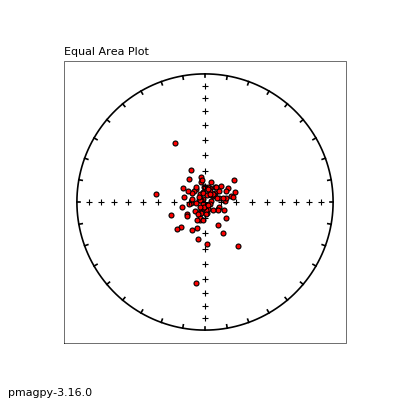

In [40]:
Image(filename='ps12-1c-rot_eq.png')

It looks like the inclinations are spread out too much.  Let's see what **fishqq.py** has to say.

In [41]:
!fishqq.py -f Chapter_12/ps12-1c.di -sav -fmt png

1  saved in  Chapter_12-ps12-1c.di_unf1.png
2  saved in  Chapter_12-ps12-1c.di_exp1.png


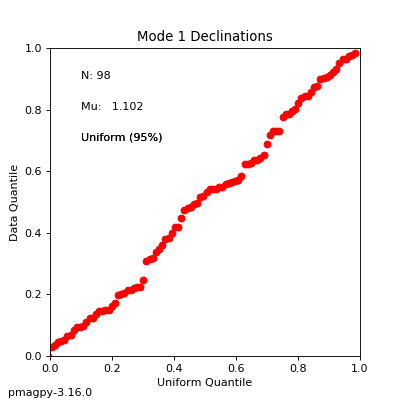

In [42]:
Image(filename='Chapter_12-ps12-1c.di_unf1.png')

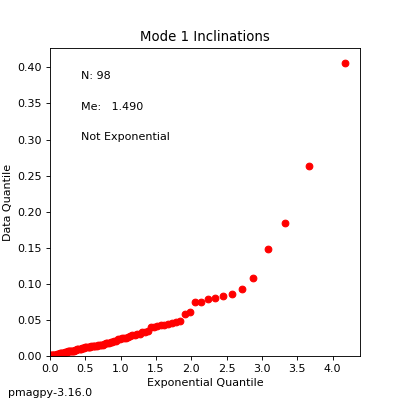

In [43]:
Image(filename='Chapter_12-ps12-1c.di_exp1.png')

And sure enough...  the inclinations are too spread out.  They are not exponentially distributed.

## Problem 2a

There are two ways to do a fold test in a Jupyter Notebook:  **ipmag.bootstrap_fold_test( )** and the command line **foldtest.py**.  Let's start with the **ipmag** way:

 

In [44]:
help(ipmag.bootstrap_fold_test)

Help on function bootstrap_fold_test in module pmagpy.ipmag:

bootstrap_fold_test(Data, num_sims=1000, min_untilt=-10, max_untilt=120, bedding_error=0, save=False, save_folder='.', fmt='svg', ninety_nine=False)
    Conduct a bootstrap fold test (Tauxe and Watson, 1994)
    
    Three plots are generated: 1) equal area plot of uncorrected data;
    2) tilt-corrected equal area plot; 3) bootstrap results showing the trend
    of the largest eigenvalues for a selection of the pseudo-samples (red
    dashed lines), the cumulative distribution of the eigenvalue maximum (green
    line) and the confidence bounds that enclose 95% of the pseudo-sample
    maxima. If the confidence bounds enclose 100% unfolding, the data "pass"
    the fold test.
    
    Parameters
    ----------
    Data : a numpy array of directional data [dec, inc, dip_direction, dip]
    num_sims : number of bootstrap samples (default is 1000)
    min_untilt : minimum percent untilting applied to the data (default is -10%)

So we first have to read in the data and make sure it is in a suitable array, then call **ipmag.bootstrap_fold_test( )**.  

In [45]:
fold_data=np.loadtxt('Chapter_12/ps12-2.dat')
fold_data

array([[ 347.242   ,   52.2493  ,  -11.7771  ,   -2.      ],
       [   9.68049 ,   51.7727  ,  -11.7771  ,   -2.      ],
       [ 338.216   ,   46.0366  ,  -11.7771  ,   -2.      ],
       [ 358.397   ,   37.2573  ,   -6.1946  ,  -21.      ],
       [ 339.636   ,   42.4709  ,   -6.1946  ,  -21.      ],
       [ 334.918   ,   46.4638  ,   -6.1946  ,  -21.      ],
       [  13.7035  ,   41.6794  ,   -4.3937  ,  -29.      ],
       [ 331.639   ,   29.0275  ,   -4.3937  ,  -29.      ],
       [ 349.954   ,   47.9429  ,   -4.3937  ,  -29.      ],
       [ 342.736   ,   20.8759  ,    1.6775  ,  -47.      ],
       [   4.08913 ,   43.7593  ,    1.6775  ,  -47.      ],
       [ 359.68    ,   30.4149  ,    1.6775  ,  -47.      ],
       [ 346.004   ,   47.2846  ,    6.8026  ,   -9.      ],
       [ 342.047   ,   46.6271  ,    6.8026  ,   -9.      ],
       [ 347.862   ,   31.7526  ,    6.8026  ,   -9.      ],
       [   0.583997,   32.1065  ,    7.4077  ,    0.      ],
       [ 347.8     ,   3

doing  1000  iterations...please be patient.....


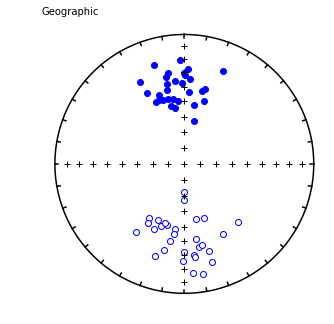

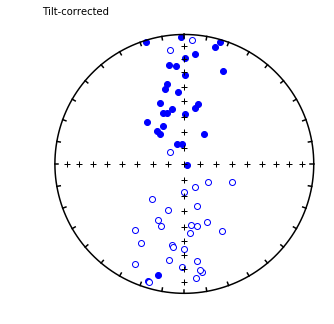


tightest grouping of vectors obtained at (95% confidence bounds):
-2 - 20 percent unfolding
range of all bootstrap samples: 
-8  -  24 percent unfolding


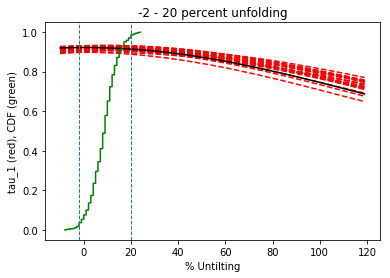

In [52]:
ipmag.bootstrap_fold_test(fold_data)

So how does foldtest.py work? 

In [47]:
!foldtest.py -h


    NAME
       foldtest.py

    DESCRIPTION
       does a fold test (Tauxe, 2010) on data

    INPUT FORMAT
       dec inc dip_direction dip

    SYNTAX
       foldtest.py [command line options]

    OPTIONS
        -h prints help message and quits
        -f FILE file with input data
        -F FILE for confidence bounds on fold test
        -u ANGLE (circular standard deviation) for uncertainty on bedding poles
        -b MIN MAX bounds for quick search of percent untilting [default is -10 to 150%]
        -n NB  number of bootstrap samples [default is 1000]
        -fmt FMT, specify format - default is svg
        -sav  save figures and quit
    INPUT FILE
	Dec Inc Dip_Direction Dip  in space delimited file

    OUTPUT PLOTS
        Geographic: is an equal area projection of the input data in
                    original coordinates
        Stratigraphic: is an equal area projection of the input data in
                    tilt adjusted coordinates
        % Untilting: The dashed 

Let's give it a whirl with the data set for problem 2a.

In [48]:
!foldtest.py -f Chapter_12/ps12-2.dat -sav -fmt png

doing  1000  iterations...please be patient.....
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
-2 - 20 Percent Unfolding
range of all bootstrap samples:  -10  -  25
1  saved in  foldtest_ge.png
2  saved in  foldtest_st.png
3  saved in  foldtest_ta.png


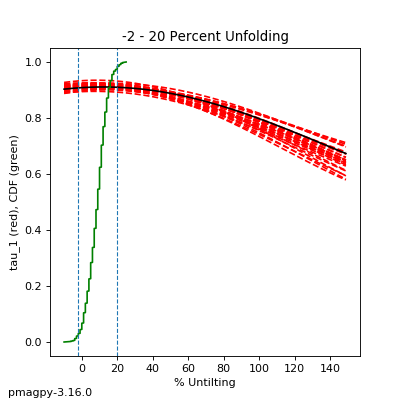

In [49]:
Image(filename='foldtest_ta.png')

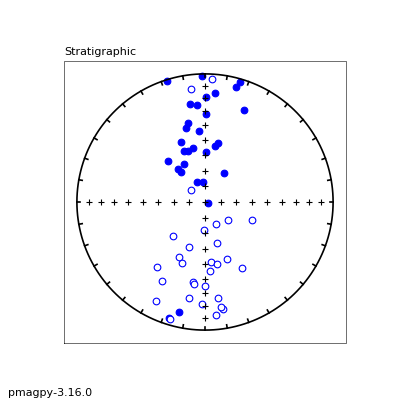

In [50]:
Image(filename='foldtest_st.png')

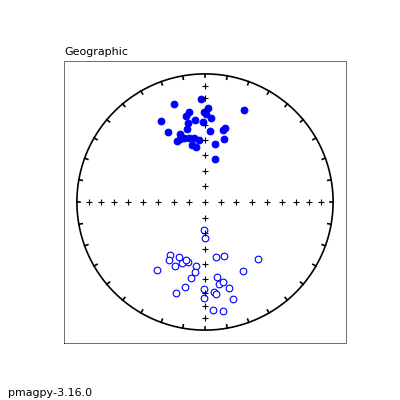

In [51]:
Image(filename='foldtest_ge.png')

These data are much better grouped in geographic coordinates and much worse after tilt correction.  So these were magnetized after tilting.  

## Problem 2b

Now we try it with uncertainty in the bedding poles.

In [110]:
!foldtest.py -f Chapter_12/ps12-2.dat -sav -fmt png -u 10

doing  1000  iterations...please be patient.....
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
-2 - 19 Percent Unfolding
range of all bootstrap samples:  -7  -  27
3  saved in  foldtest_ta.png
2  saved in  foldtest_st.png
1  saved in  foldtest_ge.png


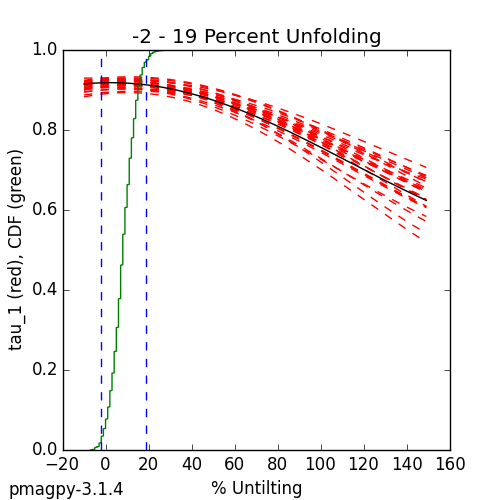

In [111]:
Image(filename='foldtest_ta.png')

And no, the answer didn't change.  

## Problem 3a

We know what to do here:  

In [53]:
!eqarea.py -f Chapter_12/ps12-3.dat -sav -fmt png

1  saved in  ps12-3_eq.png


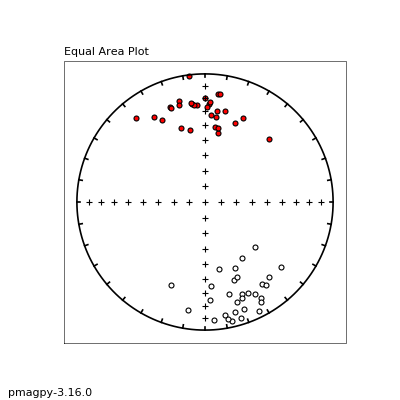

In [54]:
Image(filename='ps12-3_eq.png')

## Problem 3b

To separate by polarity, one could just sort by inclination and put all the negative ones in one group and all the positive ones in the other.  But a more general approach (which would allow southward directed declinations with positive inclinations, for example, would be to read the data into a Pandas DataFrame, calculate the principal direction of the entire dataset using **goprinc.py** and calculating the directions rotated to that reference.  Then all positive inclinations would be one polarity (say, normal) and the other would all be the reverse polarity.  So, here goes.

In [57]:
import pandas as pd

In [58]:
data=pd.read_csv("Chapter_12/ps12-3.dat",delim_whitespace=True,header=None)
data=pd.DataFrame(data) # make a Pandas DataFrame
data.columns=["Dec","Inc"] # Assign column headers
# make an array of decs and incs using numpy
DIblock=np.array([data["Dec"],data["Inc"]]).transpose()
# send this to doprinc in pmag

In [59]:
help(pmag.doprinc)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components



In [61]:
# calculate the principle direction for the data set
principal=pmag.doprinc(DIblock)
print ('Principal direction declination: ' + '%7.1f'%(principal['dec']))
print ('Principal direction inclination: ' + '%7.1f'%(principal['inc']))


Principal direction declination:   348.5
Principal direction inclination:    25.5


Now we can use some nice **Pandas** functionality to assign polarity:

In [65]:
data['principal_dec'] = principal['dec'] # assign these to the dataframe
data['principal_inc'] = principal['inc']
principal_block=np.array([data.principal_dec,data.principal_inc]).transpose()
data['angle'] = pmag.angle(DIblock,principal_block) 
# get the angle from each data point to the principal direction
data.loc[data.angle>90,'polarity'] = 'Reverse'
data.loc[data.angle<=90,'polarity'] = 'Normal'

Now that polarity is assigned using the angle from the principal component, let's filter the data by polarity.

In [66]:
normal_data = data[data.polarity=='Normal'].reset_index(drop=True)
reverse_data = data[data.polarity=='Reverse'].reset_index(drop=True)
NormBlock=np.array([normal_data["Dec"],normal_data["Inc"]]).transpose()
RevBlock=np.array([reverse_data["Dec"],reverse_data["Inc"]]).transpose()
help(pmag.fisher_mean)

Help on function fisher_mean in module pmagpy.pmag:

fisher_mean(data)
    Calculates the Fisher mean and associated parameter from a di_block
    
    Parameters
    ----------
    di_block : a nested list of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    fisher_mean : dictionary containing the Fisher mean and statistics



In [67]:
norm_stats= pmag.fisher_mean(NormBlock)
print ('Mean normal declination: ' + '%7.1f'%(norm_stats['dec']))
print ('Mean normal inclination: ' + '%7.1f'%(norm_stats['inc']))



Mean normal declination:   357.6
Mean normal inclination:    27.8


In [68]:
rev_stats= pmag.fisher_mean(RevBlock)
print ('Mean reverse declination: ' + '%7.1f'%(rev_stats['dec']))
print ('Mean reverse inclination: ' + '%7.1f'%(rev_stats['inc']))



Mean reverse declination:   160.1
Mean reverse inclination:   -23.2


Now let's check if the data are Fisher distributed using our old friend **ipmag.fishqq( )**

In [72]:
help(ipmag.fishqq)

Help on function fishqq in module pmagpy.ipmag:

fishqq(lon=None, lat=None, di_block=None)
    Test whether a distribution is Fisherian and make a corresponding Q-Q plot.
    The Q-Q plot shows the data plotted against the value expected from a
    Fisher distribution. The first plot is the uniform plot which is the
    Fisher model distribution in terms of longitude (declination). The second
    plot is the exponential plot which is the Fisher model distribution in terms
    of latitude (inclination). In addition to the plots, the test statistics Mu
    (uniform) and Me (exponential) are calculated and compared against the
    critical test values. If Mu or Me are too large in comparision to the test
    statistics, the hypothesis that the distribution is Fisherian is rejected
    (see Fisher et al., 1987).
    
    Parameters:
    -----------
    lon : longitude or declination of the data
    lat : latitude or inclination of the data
        or
    di_block: a nested list of [dec,inc

In [78]:
!fishqq.py -f Chapter_12/ps12-3.dat -sav -fmt png

1  saved in  Chapter_12-ps12-3.dat_unf1.png
2  saved in  Chapter_12-ps12-3.dat_exp1.png
3  saved in  Chapter_12-ps12-3.dat_unf2.png
4  saved in  Chapter_12-ps12-3.dat_exp2.png


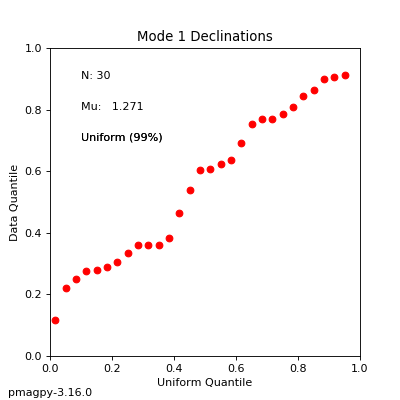

In [79]:
Image(filename="Chapter_12-ps12-3.dat_unf1.png")

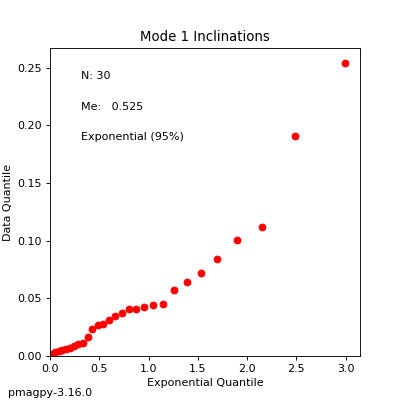

In [80]:
Image(filename="Chapter_12-ps12-3.dat_exp1.png")

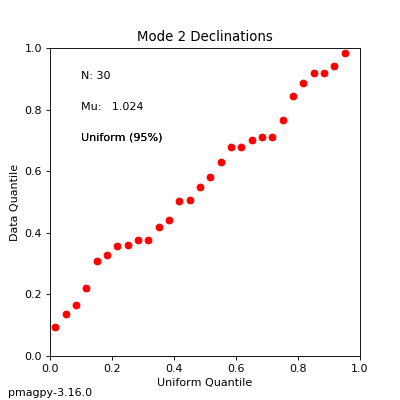

In [81]:
Image(filename="Chapter_12-ps12-3.dat_unf2.png")

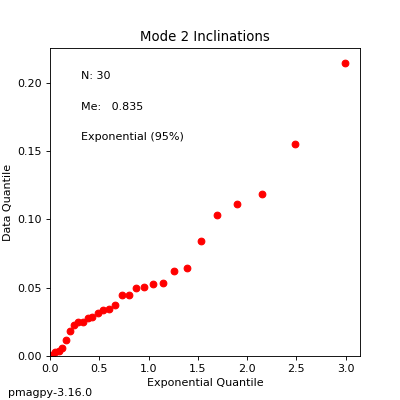

In [82]:
Image(filename="Chapter_12-ps12-3.dat_exp2.png")

The uniform null hypothesis fails at the 95\% confidence level for the normal data. So lets try **pmag.dobingham()** and **pmag.dokent( )**  for the whole dataset and the norm and reverse data, respectively.  Note that dokent has a different syntax.  

In [84]:
print (pmag.dobingham(DIblock))

{'dec': 348.465539769445, 'inc': 25.52682229909027, 'Edec': 85.049197823549818, 'Einc': 13.500468651744923, 'Zdec': 200.32649883656464, 'Zinc': 60.652430085265337, 'n': 60, 'Zeta': 3.8234970406603126, 'Eta': 5.3636010820802538}


In [85]:
print (pmag.dokent(NormBlock,len(NormBlock)))

{'dec': 357.57284485451623, 'inc': 27.790698496492777, 'n': 30, 'Zdec': 95.302931736371235, 'Zinc': 14.317106237308186, 'Edec': 209.55471133505026, 'Einc': 58.145547650216855, 'Zeta': 6.9644465206638122, 'Eta': 3.9475388648849692}


In [86]:
print (pmag.dokent(RevBlock,len(RevBlock)))

{'dec': 160.05924515863398, 'inc': -23.164679195327182, 'n': 30, 'Zdec': 233.6497654593739, 'Zinc': 33.434631439520047, 'Edec': 97.779116509459982, 'Einc': 47.390356077306656, 'Zeta': 6.2903798372165705, 'Eta': 5.5585004286478936}


In [87]:
!eqarea_ell.py -h


    NAME
        eqarea_ell.py

    DESCRIPTION
       makes equal area projections from declination/inclination data
       and plot ellipses

    SYNTAX 
        eqarea_ell.py -h [command line options]
    
    INPUT 
       takes space delimited Dec/Inc data
    
    OPTIONS
        -h prints help message and quits
        -f FILE
        -fmt [svg,png,jpg] format for output plots
        -sav  saves figures and quits
        -ell [F,K,B,Be,Bv] plot Fisher, Kent, Bingham, Bootstrap ellipses or Boostrap eigenvectors
    


In [88]:
!eqarea_ell.py -sav -f Chapter_12/ps12-3.dat -fmt png -ell Be

Be patient for bootstrap...
mode  1
     dec   357.6
     inc    27.8
     n        1
     Zdec    95.8
     Zinc    15.1
     Edec   211.0
     Einc    57.7
     Zeta     6.9
     Eta     3.9
mode  2
     dec   160.1
     inc   -23.2
     n        1
     Zdec   236.3
     Zinc    29.2
     Edec   102.2
     Einc    51.2
     Zeta     6.3
     Eta     5.5
1  saved in  Chapter_12-ps12-3.dat_eq.png


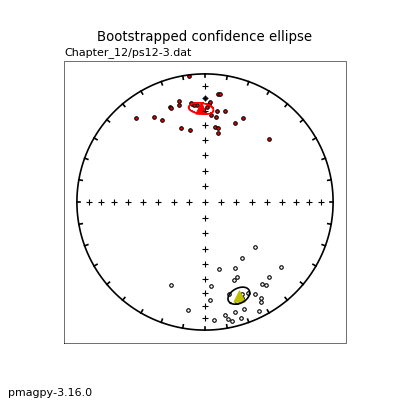

In [89]:
Image(filename="Chapter_12-ps12-3.dat_eq.png")

Here's the Bingham one:

In [90]:
!eqarea_ell.py -sav -f Chapter_12/ps12-3.dat -fmt png -ell B

     dec   348.5
     inc    25.5
     Edec    85.0
     Einc    13.5
     Zdec   200.3
     Zinc    60.7
     n        60
     Zeta     3.8
     Eta     5.4
1  saved in  Chapter_12-ps12-3.dat_eq.png


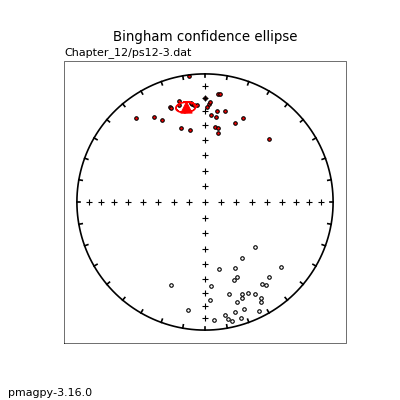

In [91]:
Image(filename="Chapter_12-ps12-3.dat_eq.png")

And now for the Kent ellipses. 

In [92]:
!eqarea_ell.py -sav -f Chapter_12/ps12-3.dat -fmt png -ell K

mode  1
     dec   357.6
     inc    27.8
     n        30
     Zdec    95.3
     Zinc    14.3
     Edec   209.6
     Einc    58.1
     Zeta     7.0
     Eta     3.9
mode  2
     dec   160.1
     inc   -23.2
     n        30
     Zdec   233.6
     Zinc    33.4
     Edec    97.8
     Einc    47.4
     Zeta     6.3
     Eta     5.6
1  saved in  Chapter_12-ps12-3.dat_eq.png


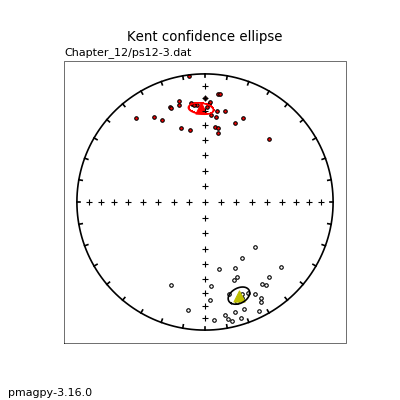

In [93]:
Image(filename="Chapter_12-ps12-3.dat_eq.png")

The Kent ellipses do a pretty good job - as well as the bootstrapped ones.

## Problem 3c

In [94]:
!watsons_v.py -h


    NAME
       watsons_v.py

    DESCRIPTION
       calculates Watson's V statistic from input files

    INPUT FORMAT
       takes dec/inc as first two columns in two space delimited files

    SYNTAX
       watsons_v.py [command line options]

    OPTIONS
        -h prints help message and quits
        -f FILE (with optional second)
        -f2 FILE (second file)
        -ant,  flip antipodal directions to opposite direction
           in first file if only one file or flip all in second, if two files
        -P  (don't save or show plot)
        -sav save figure and quit silently
        -fmt [png,svg,eps,pdf,jpg] format for saved figure

    OUTPUT
        Watson's V and the Monte Carlo Critical Value Vc.
        in plot, V is solid and Vc is dashed.

    


In [96]:
!watsons_v.py -P -f Chapter_12/ps12-3.dat -ant -sav -fmt png

Watson's V,  Vcrit: 
         23.3        6.1
1  saved in  watsons_v_ps12-3.png


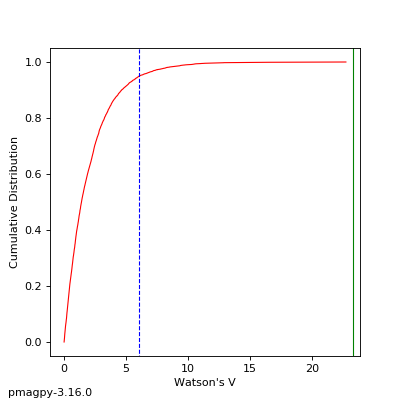

In [99]:
Image(filename="watsons_v_ps12-3.png")

We read in the data from the first file and asked **watsons_v.py** to split the data into the set of directions parallel to the principal direction and the other, flipped to their antipodes.  These two are not drawn from the same distribution (according to watson's Vw criterion), so they fail the reversals test.   Now let's try the program **revtest.py**

In [100]:
!revtest.py -h


    NAME
       revtest.py

    DESCRIPTION
       calculates bootstrap statistics to test for antipodality

    INPUT FORMAT
       takes dec/inc as first two columns in space delimited file
   
    SYNTAX
       revtest.py [-h] [command line options]
    
    OPTION
       -h prints help message and quits
       -f FILE, sets input filename on command line
       -fmt [svg,png,jpg], sets format for image output
       -sav saves the figures silently and quits
               

    


In [101]:
!revtest.py -sav -f Chapter_12/ps12-3.dat -fmt png

doing first mode, be patient
doing second mode, be patient
1  saved in  REV_X.png
2  saved in  REV_Y.png
3  saved in  REV_Z.png


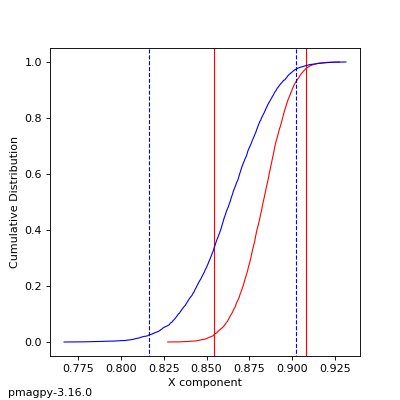

In [102]:
Image(filename="REV_X.png")

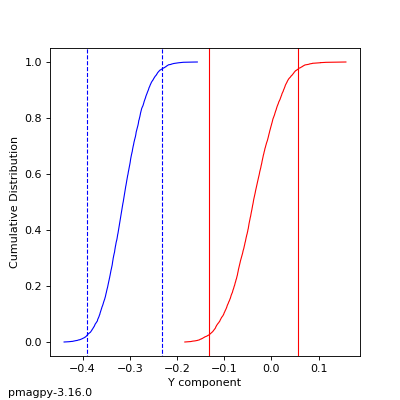

In [103]:
Image(filename="REV_Y.png")

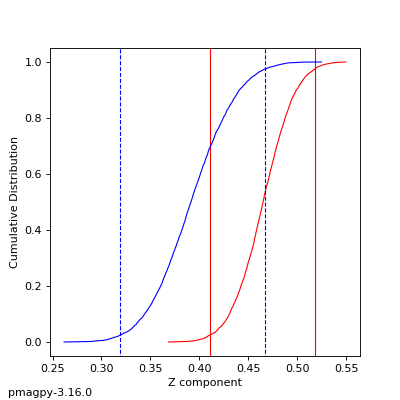

In [104]:
Image(filename="REV_Z.png")

The Y components are significantly different in the reverse mode (after flippint) with respect to the normal mode.  Therefore, this data set fails the reversals test.